In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Sleep_Efficiency.csv")
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [4]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

In [5]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

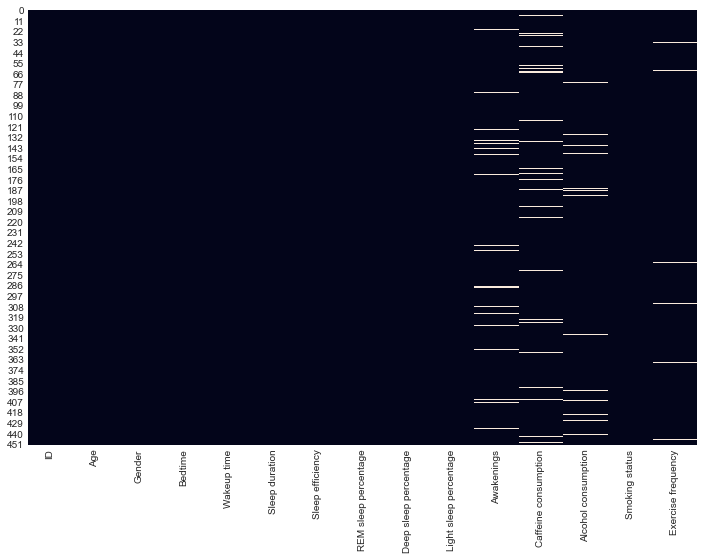

In [7]:
fig, axes = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [8]:
print(f"{df.shape[0] - df.dropna().shape[0]} rows would be dropped if all rows with nulls were excluded")
print(f"{((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100 :.1f}% of data would be lost if all rows with nulls were dropped")

64 rows would be dropped if all rows with nulls were excluded
14.2% of data would be lost if all rows with nulls were dropped


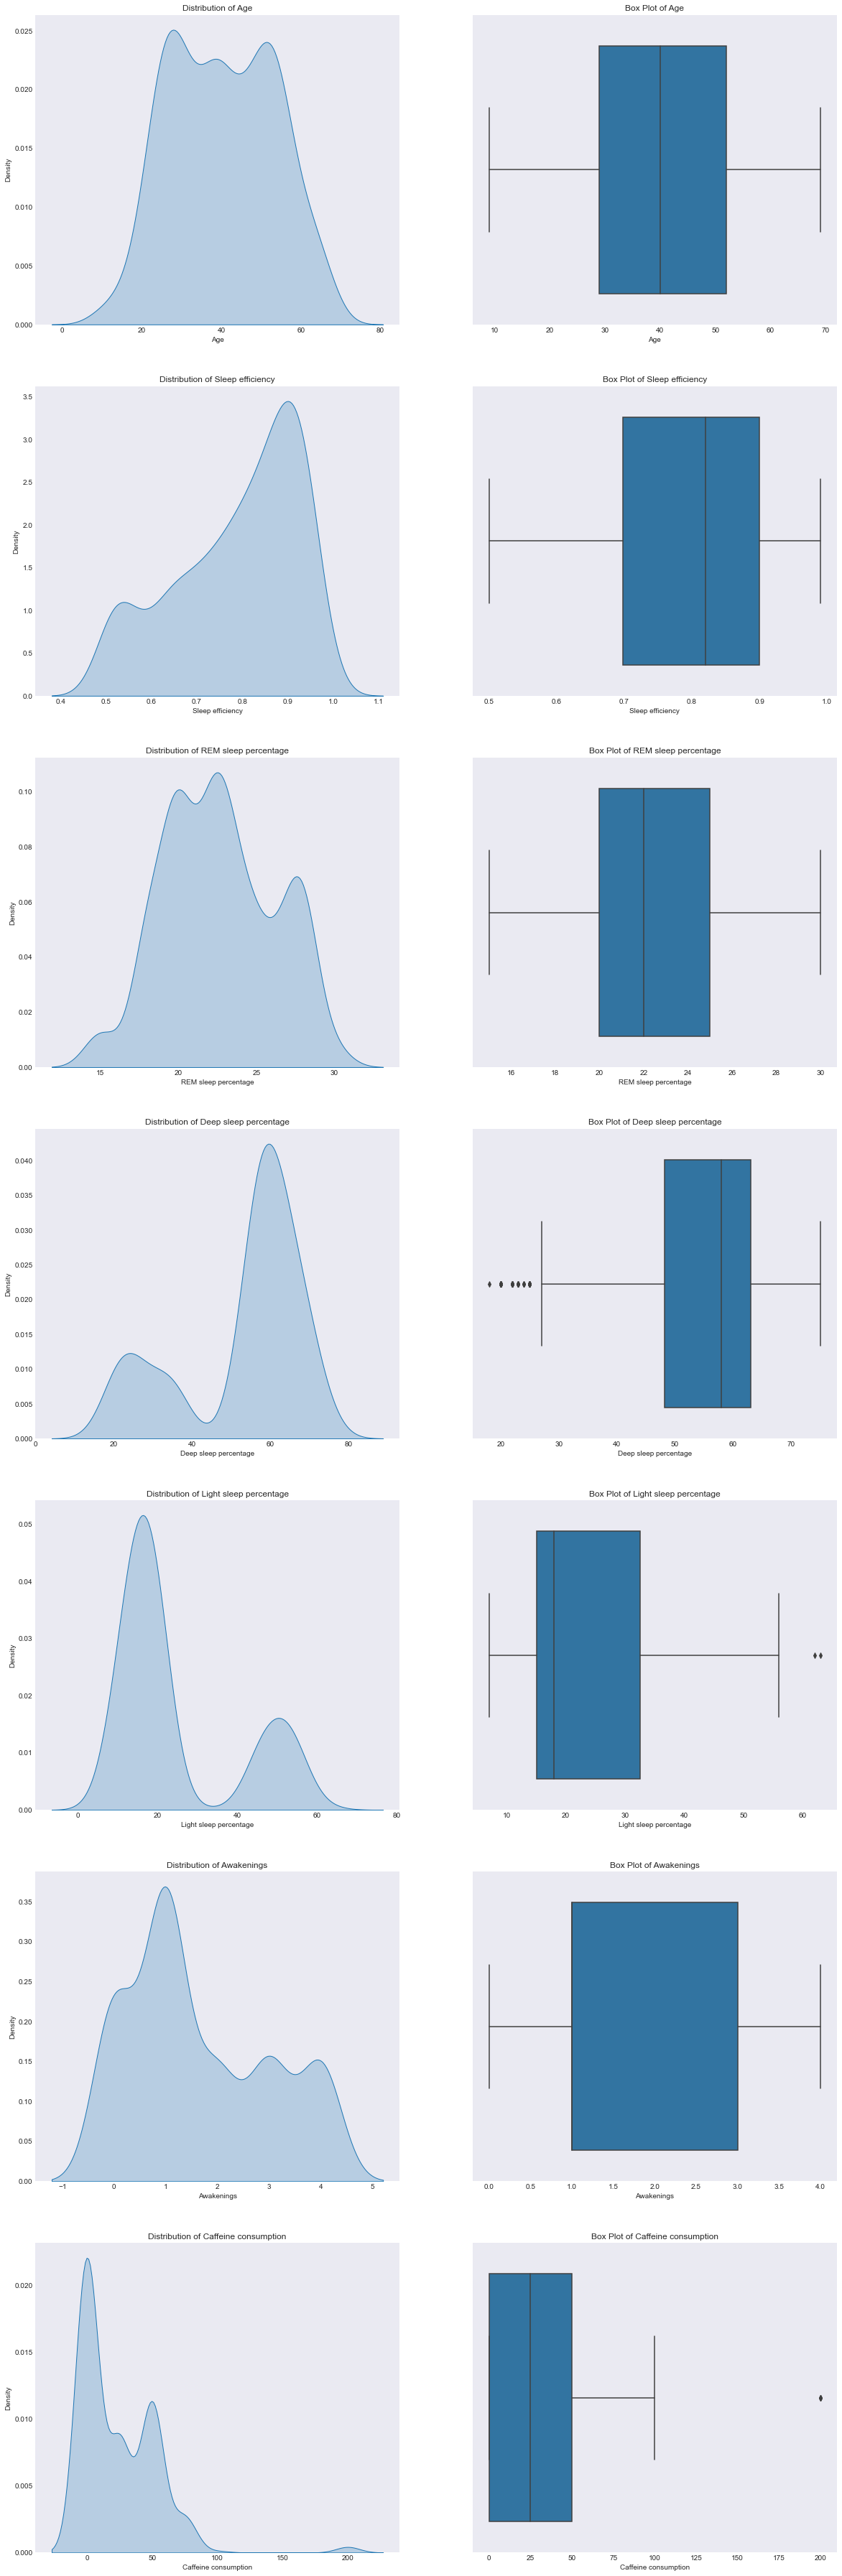

In [9]:
fig, ax = plt.subplots(7,2, figsize=(20,65))
idx = 0

features = ['Age', 'Sleep efficiency', 'REM sleep percentage',
            'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
            'Caffeine consumption']

for column in (features):
    sns.kdeplot(data=df, x=column, fill=True, ax=ax[idx][0]).set_title(f'Distribution of {column}', fontsize='12')
    sns.boxplot(data=df, x=column, orient='h', ax=ax[idx][1]).set_title(f'Box Plot of {column}', fontsize='12')
    idx +=1

plt.show()

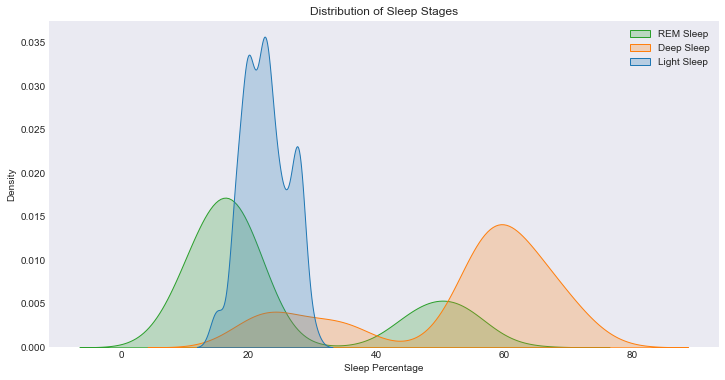

In [10]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']], shade=True)
plt.title('Distribution of Sleep Stages')
plt.xlabel('Sleep Percentage')
plt.ylabel('Density')
plt.legend(['REM Sleep', 'Deep Sleep', 'Light Sleep'])
plt.show()

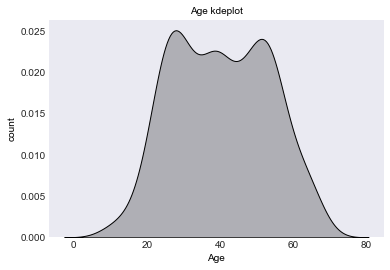

In [11]:
sns.kdeplot(data=df, x="Age",color="black",fill=True)
plt.xlabel("Age", color="black", fontsize=10)
plt.ylabel("count", color="black", fontsize=10)
plt.title("Age kdeplot", color="black",fontsize=10)
plt.show()

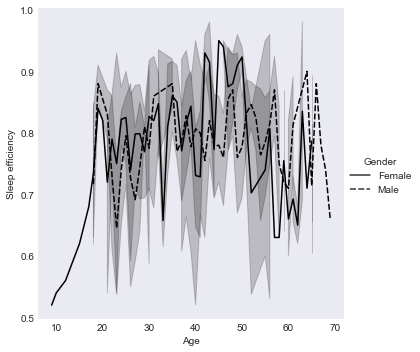

In [12]:
sns.relplot(
    data=df, kind="line",
    x="Age", y="Sleep efficiency", style="Gender", color="black"
)
plt.show()

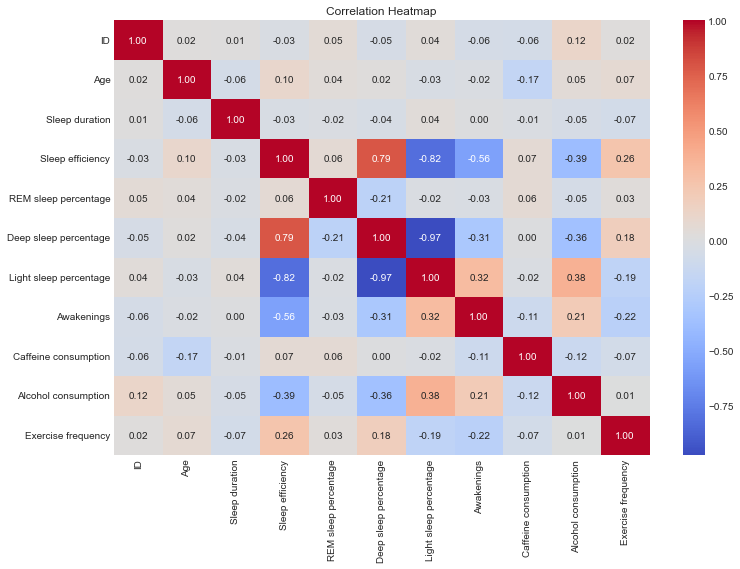

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

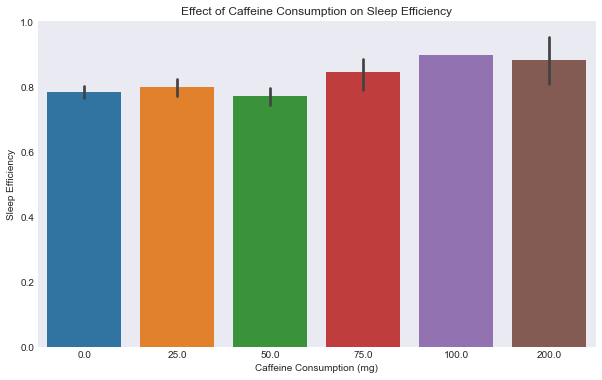

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Caffeine consumption', y='Sleep efficiency', data=df)
plt.title('Effect of Caffeine Consumption on Sleep Efficiency')
plt.xlabel('Caffeine Consumption (mg)')
plt.ylabel('Sleep Efficiency')
plt.show()

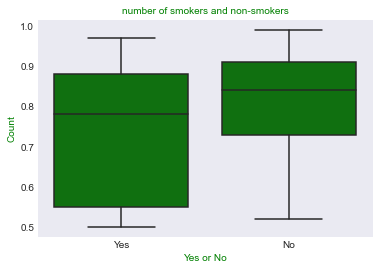

In [15]:
sns.boxplot(data=df,x="Smoking status",y="Sleep efficiency", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()

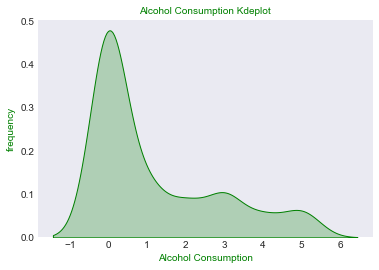

In [16]:
sns.kdeplot(data=df, x="Alcohol consumption",color="green",fill=True)
plt.xlabel("Alcohol Consumption", color="green", fontsize=10)
plt.ylabel("frequency", color="green", fontsize=10)
plt.title("Alcohol Consumption Kdeplot", color="green",fontsize=10)
plt.show()

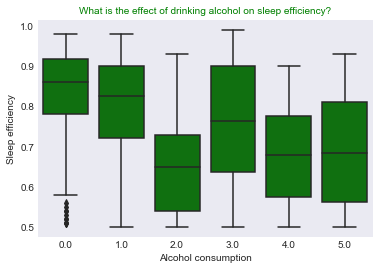

In [17]:
sns.boxplot(data=df,x="Alcohol consumption",y="Sleep efficiency", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

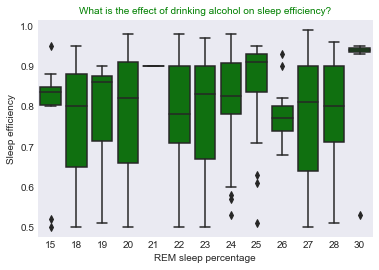

In [18]:
sns.boxplot(data=df,x="REM sleep percentage",y="Sleep efficiency", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

In [19]:
df['male'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)
df['smoking'] = df['Smoking status'].apply(lambda x:1 if x == 'Yes' else 0)
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,male,smoking
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,0,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,1,1
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,0,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,0,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,0


In [20]:
df = df.drop(['ID', 'Bedtime', 'Wakeup time', 'Gender', 'Smoking status'], axis='columns')
df.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,male,smoking
0,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1
1,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0


In [21]:
df.describe(include='all')

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,male,smoking
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000,452.000000,452.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480,0.504425,0.340708
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134,0.500534,0.474472
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000,1.000000,0.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000,1.000000,1.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000,1.000000,1.000000


In [22]:
df = df.dropna()
df.describe(include='all')

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,male,smoking
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,40.829897,7.451031,0.789253,22.680412,52.822165,24.497423,1.618557,22.680412,1.146907,1.757732,0.500000,0.342784
std,13.403187,0.883483,0.135706,3.430510,15.571518,15.309638,1.355958,28.997566,1.612793,1.447824,0.500646,0.475253
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000,0.500000,0.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,24.000000,3.000000,50.000000,2.000000,3.000000,1.000000,1.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000,1.000000,1.000000


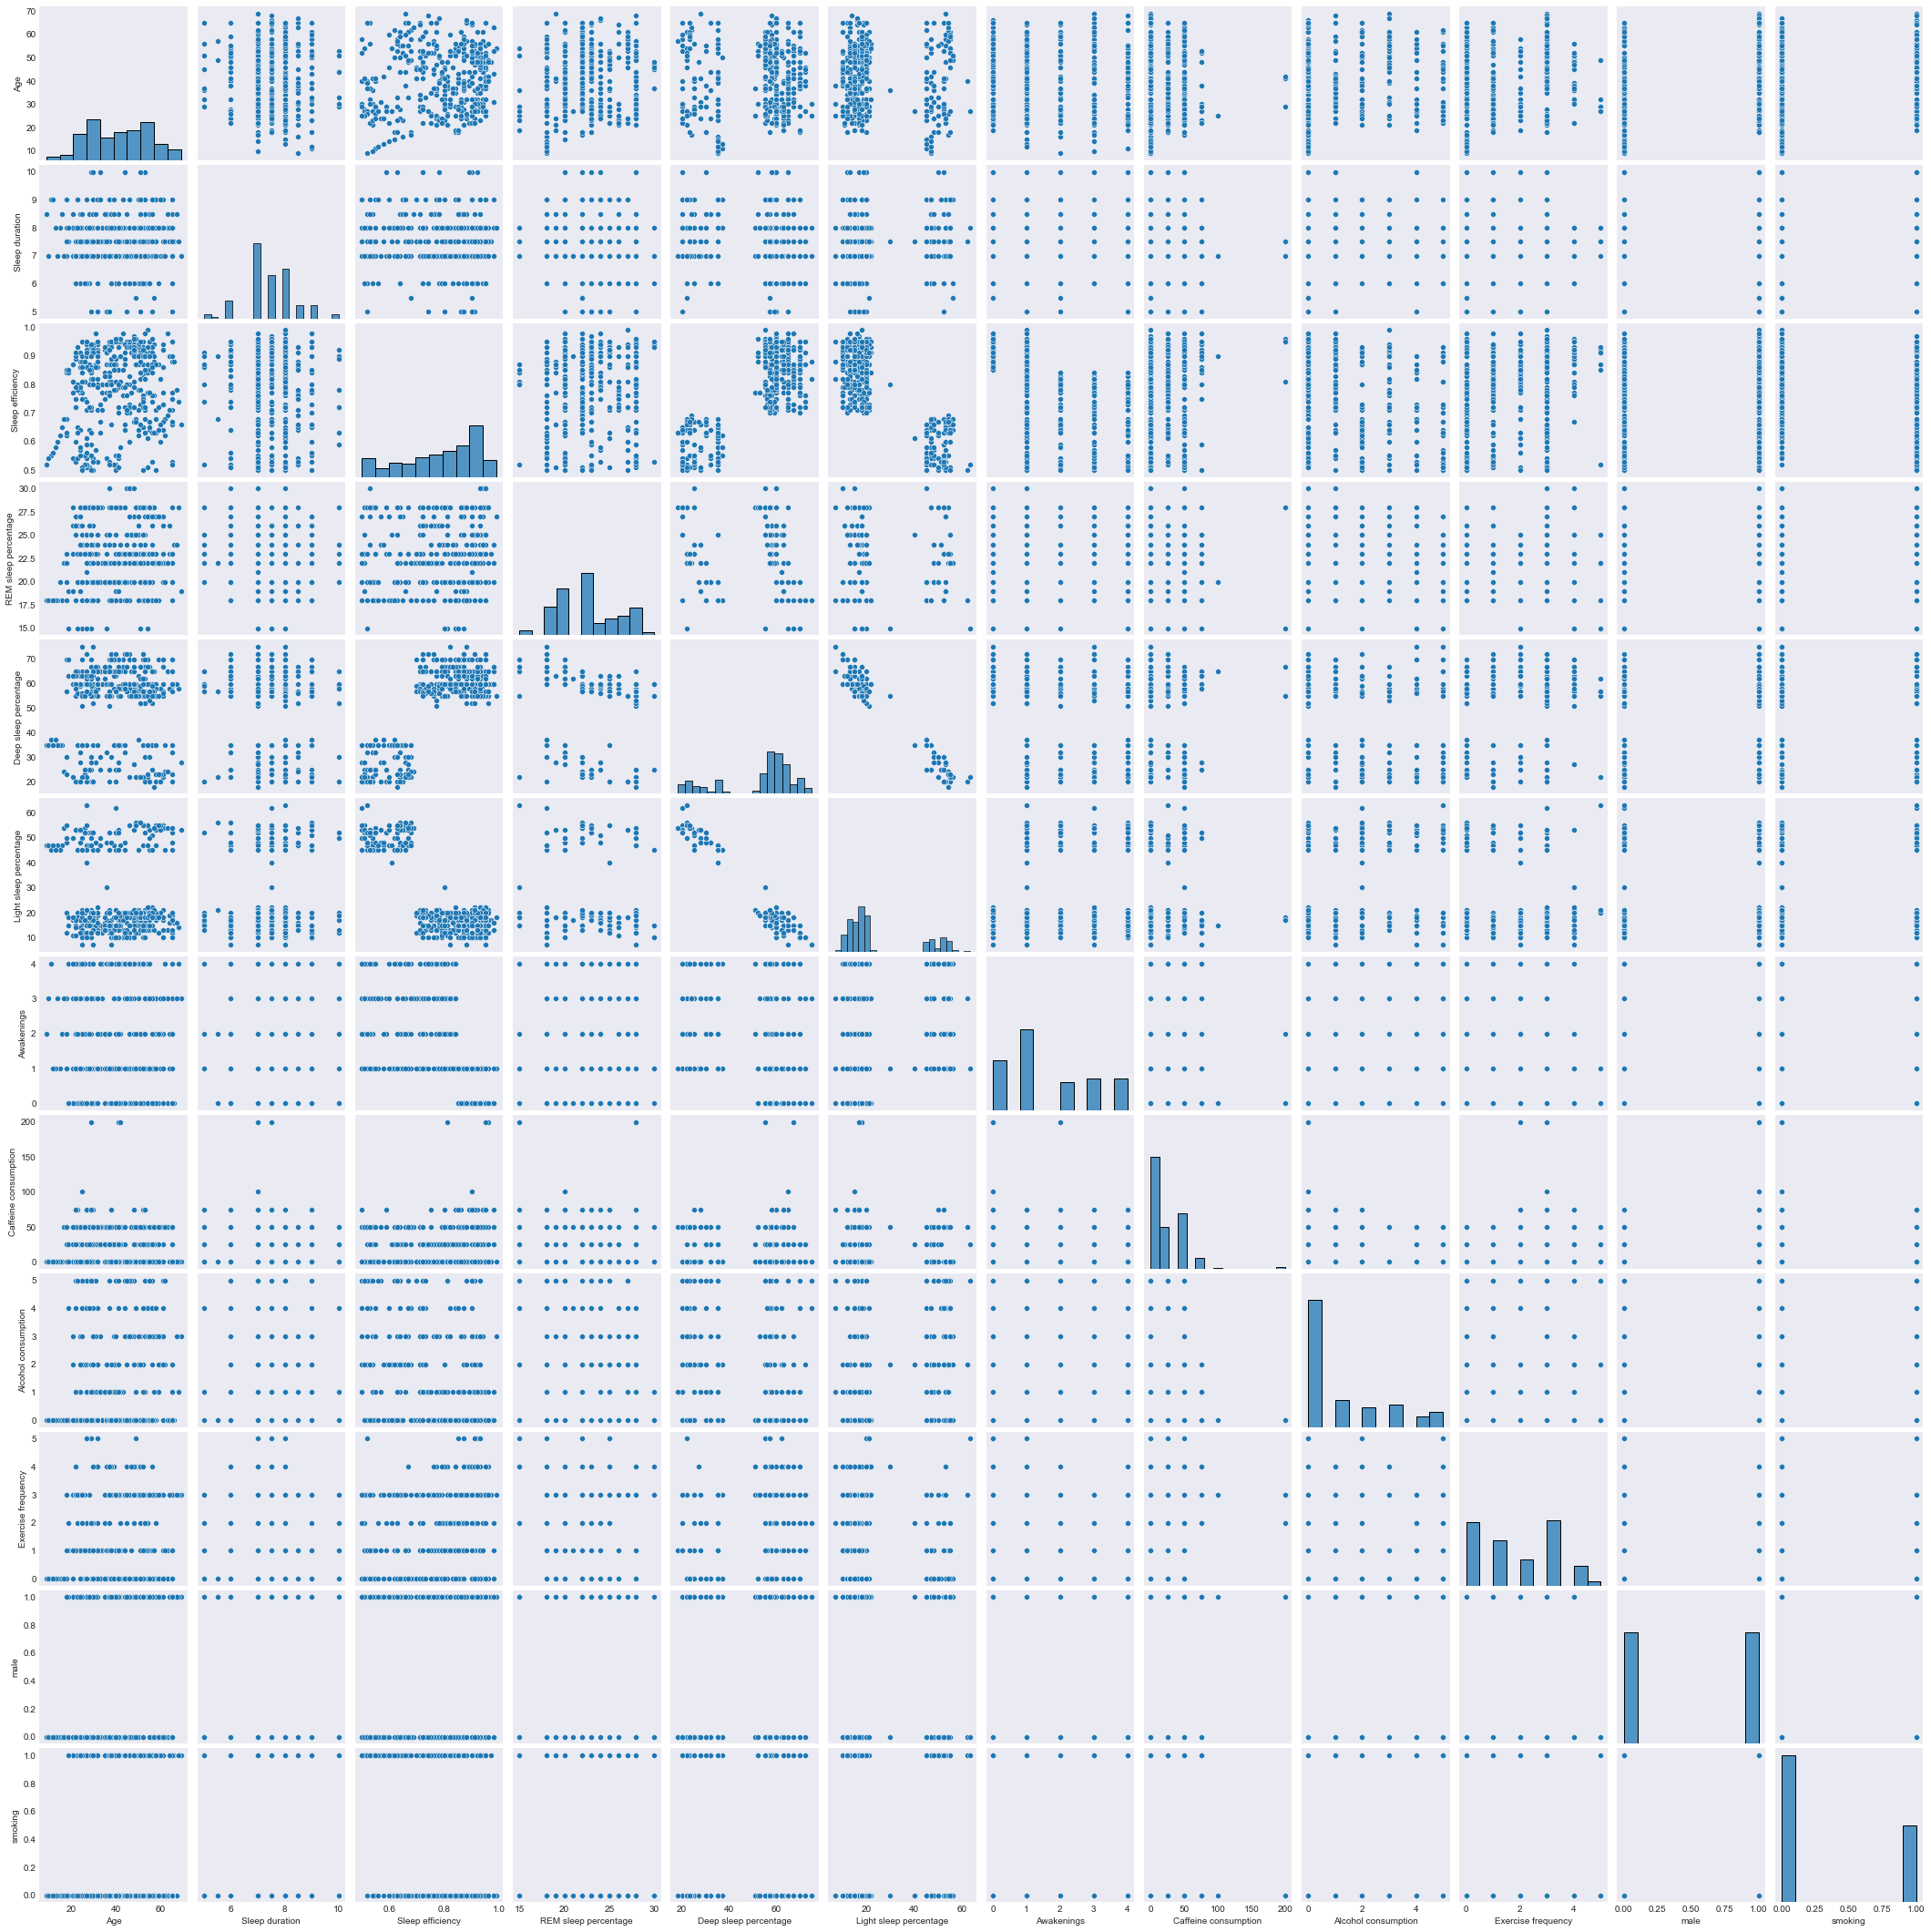

In [23]:
sns.pairplot(df)

<AxesSubplot:>

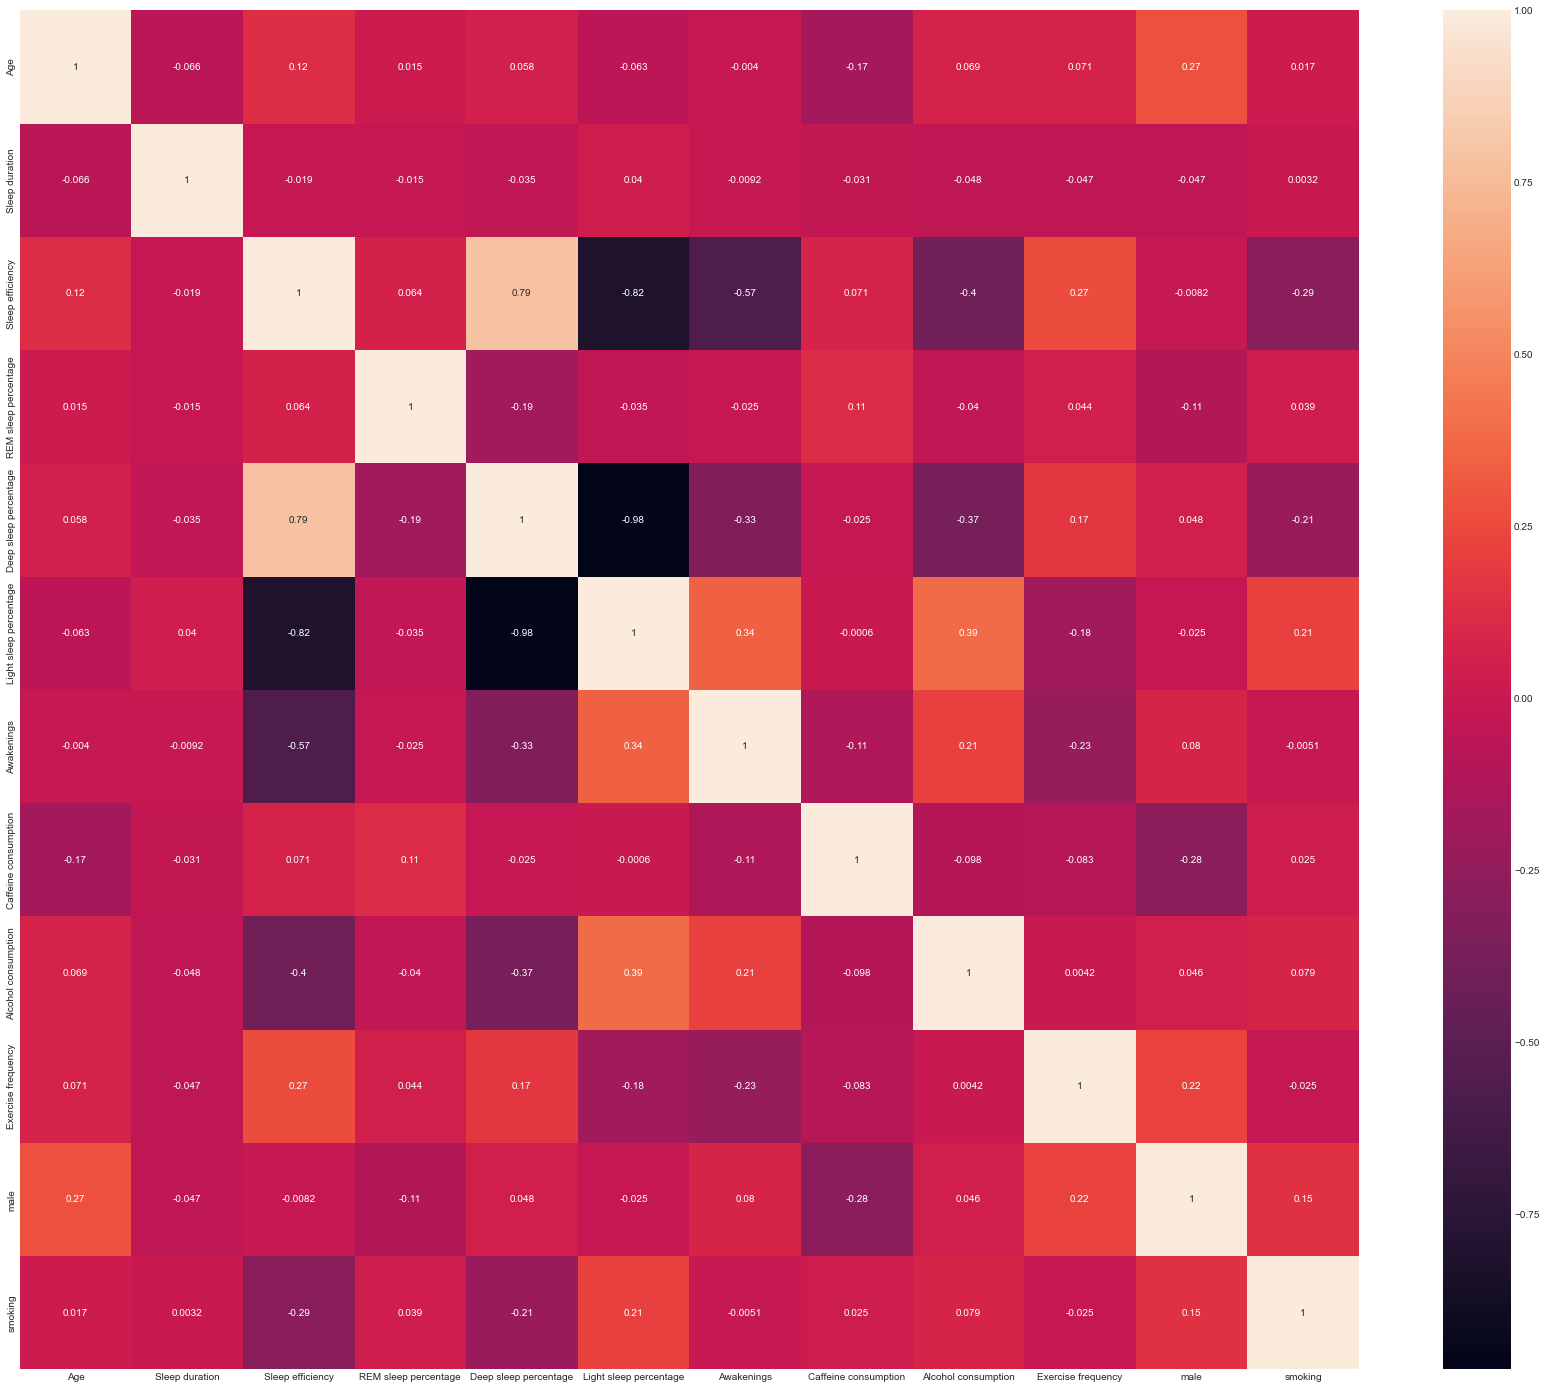

In [24]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True)

In [25]:
outcome_measures = ['Sleep efficiency', 'Light sleep percentage', 'REM sleep percentage', 'Deep sleep percentage', 'Awakenings']

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [27]:
X = df.drop(outcome_measures, axis='columns')
y = df[outcome_measures]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [30]:
from lazypredict.Supervised import LazyRegressor

# Initialize an empty dictionary to store models
models_dict = {}


for col in y_train.columns:
    print(f"Training model for target: {col}")
    
    # Extract the single target column
    y_train_single = y_train[col]
    y_test_single = y_test[col]
    
    reg = LazyRegressor(verbose=-1, custom_metric=None)

    models, predictions = reg.fit(X_train, X_test, y_train_single, y_test_single)
    
    # Save the model results in the dictionary
    models_dict[col] = models

Training model for target: Sleep efficiency


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.42it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 310, number of used features: 7
[LightGBM] [Info] Start training from score 0.786677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 16.25it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 310, number of used features: 7
[LightGBM] [Info] Start training from score 24.922581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 15.58it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 310, number of used features: 7
[LightGBM] [Info] Start training from score 22.738710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 16.00it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 310, number of used features: 7
[LightGBM] [Info] Start training from score 52.338710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 14.35it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 310, number of used features: 7
[LightGBM] [Info] Start training from score 1.638710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [31]:
results_list = []
for target, models in models_dict.items():
    for model_name, row in models.iterrows():
        results_list.append([target, model_name] + row.tolist())

columns = ["Outcome Measure", "Model"] + list(models.columns)
results_df = pd.DataFrame(results_list, columns=columns)

print(results_df.to_string())

            Outcome Measure                          Model  Adjusted R-Squared  R-Squared    RMSE  Time Taken
0          Sleep efficiency      GradientBoostingRegressor                0.44       0.49    0.09        0.04
1          Sleep efficiency              AdaBoostRegressor                0.37       0.43    0.10        0.04
2          Sleep efficiency            KNeighborsRegressor                0.37       0.42    0.10        0.02
3          Sleep efficiency          RandomForestRegressor                0.37       0.42    0.10        0.16
4          Sleep efficiency                  LGBMRegressor                0.36       0.41    0.10        0.21
5          Sleep efficiency  HistGradientBoostingRegressor                0.35       0.41    0.10        0.20
6          Sleep efficiency                    LassoLarsCV                0.26       0.32    0.10        0.02
7          Sleep efficiency                         LarsCV                0.26       0.32    0.10        0.02
8         

In [32]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

In [34]:
warnings.filterwarnings("ignore")
measures = []
model_names = []
model_mean_mses = []
for outcome_measure in outcome_measures:
    models = {
        'GB Regressor': GradientBoostingRegressor(),
        'RF Regressor': RandomForestRegressor(),
        'Linear Regression': LinearRegression(),
        'ElasticNet': ElasticNet(),
        'SGD Regressor': SGDRegressor(),
        'Bayesian Ridge': BayesianRidge(),
        'SVR': SVR(),
        'Kernel Ridge': KernelRidge(),
        'XGBoost': XGBRegressor(),
    }
    y_outcome = y_train[outcome_measure]
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train_scaled, y_outcome, scoring='neg_mean_squared_error')
        measures.append(outcome_measure)
        model_names.append(model_name)
        model_mean_mses.append(-scores.mean())
        print(f'Model mean MSE calculation completed for {outcome_measure}')

Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Model mean MSE calculation completed for Light sleep percentage
Model mean MSE calculation completed for Light sleep percentage
Model mean MSE calculation completed for Light sleep percentage
Model mean MSE calculation completed for Light sleep percentage
Model mean MSE calculation completed for Light sleep percentage
Model mean MSE calculation completed for Light sleep percentage
Model mean MSE calculation completed for Light sleep percentage
Model mean MSE calculation com

In [35]:
model_scores = pd.DataFrame()
model_scores['outcome measure'] = measures
model_scores['model'] = model_names
model_scores['mean mse'] = model_mean_mses
model_scores

,outcome measure,model,mean mse
0,Sleep efficiency,GB Regressor,0.01
1,Sleep efficiency,RF Regressor,0.01
2,Sleep efficiency,Linear Regression,0.01
3,Sleep efficiency,ElasticNet,0.02
4,Sleep efficiency,SGD Regressor,0.02
5,Sleep efficiency,Bayesian Ridge,0.01
6,Sleep efficiency,SVR,0.01
7,Sleep efficiency,Kernel Ridge,NaN
8,Sleep efficiency,XGBoost,0.02
9,Light sleep percentage,GB Regressor,198.87


In [36]:
chosen_models = {
    'Sleep efficiency': GradientBoostingRegressor(),
    'Light sleep percentage': RandomForestRegressor(),
    'REM sleep percentage': AdaBoostRegressor (),
    'Deep sleep percentage': GradientBoostingRegressor(),
    'Awakenings': HuberRegressor()
}

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr

In [38]:
measures = []
mses = []
maes = []
correlations = []
p_values = []
for outcome_measure in outcome_measures:
    model = chosen_models[outcome_measure]
    model.fit(X_train_scaled, y_train[outcome_measure])
    y_predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test[outcome_measure], y_predicted)
    mae = mean_absolute_error(y_test[outcome_measure], y_predicted)
    correlations_stats = spearmanr(y_test[outcome_measure], y_predicted)
    measures.append(outcome_measure)
    mses.append(mse)
    maes.append(mae)
    correlations.append(correlations_stats.correlation)
    p_values.append(correlations_stats.pvalue)

In [39]:
outcome_scores = pd.DataFrame()
outcome_scores['outcome measure'] = measures
outcome_scores['MSE'] = mses
outcome_scores['MAE'] = maes
outcome_scores['Correlation'] = correlations
outcome_scores['Correlation p-value'] = p_values
pd.set_option('display.float_format', '{:.10f}'.format)
outcome_scores

,outcome measure,MSE,MAE,Correlation,Correlation p-value
0,Sleep efficiency,0.0079661575,0.0692160392,0.5934297210,0.0000000103
1,Light sleep percentage,107.3302889029,7.5020299145,0.4101858226,0.0001916937
2,REM sleep percentage,10.2279393983,2.7011933440,0.3243398908,0.0037675201
3,Deep sleep percentage,133.1953958315,8.6949405113,0.4162011600,0.0001506962
4,Awakenings,1.4037152307,0.9673655894,0.3977920519,0.0003103215
